# Data-driven script decisions: The Office

Miembros:
 - Diana Arroyo - 157336
 - José Carlos Zamorano - 142576
 - Juan Pablo Negrete - 157962

Nuestros votos:
 - 1: Equipo 6 Pokedex
 - 2: Equipo 3 Coca-Cola
 - 3: Equipo 5 Tienda
 - 4: Equipo 4 Banco
 - 5: Equipo 1 Ruleta

## Problema
### Descripción
The Office es una serie de televisión de comedia estadounidense, se estrenó en 2005 y dejó de transmitir en 2013.

### Objetivo
Lograr tomar decisiones en torno al guion de nuevos capítulos para maximizar su recepción por los usuarios a través de las calificaciones obtenidas en Internet Movie DataBase (IMDB). Buscamos lograr este objetivo a través de la aplicación de algoritmos de aprendizaje de máquina y otras técnicas computacionales.

### Problema de decisión
Si planteamos nuestros objetivos como un problema de decisión, 
 - **Tomador de decisiones**: en nuestro problema el tomador de decisiones puede ser un productor, el director o el guionista de un capítulo de una serie de televisión.
 - **Espacio de opciones**: un sinfín de posibilidades de guiones en donde pueden variar los personajes en cada escena, las líneas de cada personaje, el contenido de las líneas, etc.
 - **Espacio de eventos**: un número de 1 a 10 que define qué tan bien se recibió el capítulo por el usuario.
 - **Espacio de consecuencias**: el director o productor toma decisiones de contenido o historia de la serie.

## Datos

En esta parte comenzaremos a utilizar código de Python para el análisis exploratorio de los datos. Comenzamos importando librerías útiles: *pandas* para organizar datos, *pyplot* y *seaborn* para graficarlos y *numpy* para procesarlos.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Descripción
Los datos que tenemos a nuestra disposición fueron obtenidos de un __[Google Spreadsheet](https://docs.google.com/spreadsheets/d/18wS5AAwOh8QO95RwHLS95POmSNKA2jjzdt0phrxeAE0/edit#gid=747974534)__ que contiene información acerca de las líneas de cada capítulo como: las línea que se dice, el personaje que la dice y la escena, el capítulo y la temporada a la que pertenecen. Se presenta una muestra de los datos a continuación:

In [2]:
# Guardamos los datos originales en el DataFrame 'raw'
raw = pd.read_csv('the-office.csv', encoding='utf-8').set_index('id')
# Muestra de 5 elementos
raw.sample(5)

,season,episode,scene,line_text,speaker,deleted
id,,,,,,
55908,9,12,15,"Well, we created a fake profile for a really c...",Erin,False
24070,5,5,1,[dressed as Carrie Bradshaw] Wow you guys look...,Kelly,False
31569,6,3,20,"Look, you guys are smart, so I'm just leveling...",Jim,False
35899,6,16,60,"[on the phone] Hey, what's up, kid?",Dwight,False
46266,8,2,32,There���s something about an underdog that rea...,Robert,False


### Análisis Exploratorio
Antes de realizar un análisis completo, comenzaremos por evaluar los datos que tenemos a nuestra disposición.

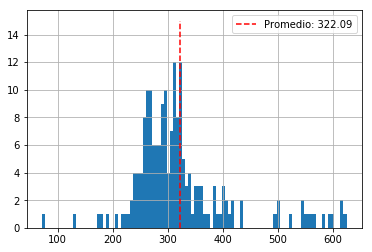

In [3]:
# Contar escenas por capítulo
raw.groupby(['season', 'episode'])['scene'].count().hist(bins=100)
plt.vlines(
    x=raw.groupby(['season', 'episode'])['scene'].count().mean(),
    linestyles='--',
    color='r',
    ymin=0,
    ymax=15,
    label="Promedio: {:.2f}".format(raw.groupby(['season', 'episode'])['scene'].count().mean()))
plt.legend()
plt.show()

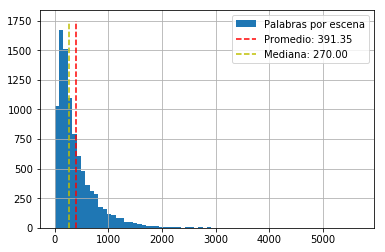

In [4]:
# Contar palabras por escena
aux = (
    raw
    .assign(words = lambda x: x.line_text.str.len())
    .groupby(['season', 'episode', 'scene'])['words']
    .sum()
)
aux.hist(bins=70, label='Palabras por escena')
plt.vlines(
    x=aux.mean(),
    linestyles='--',
    color='r',
    ymin=0,
    ymax=1750,
    label="Promedio: {:.2f}".format(aux.mean()))
plt.vlines(
    x=aux.median(),
    linestyles='--',
    color='y',
    ymin=0,
    ymax=1750,
    label="Mediana: {:.2f}".format(aux.median()))
plt.legend()
plt.show()

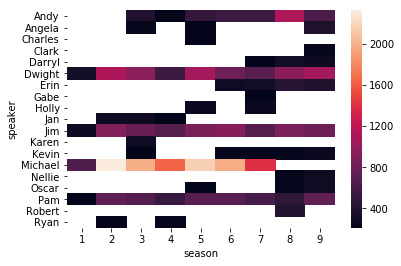

In [5]:
# Observar lineas por personaje (con más de 200 líneas) por temporada
sns.heatmap(
    raw
    .groupby(['speaker', 'season'])
    .count()
    .query('line_text > 200')
    .sort_values(by='speaker')
    .reset_index()
    .pivot(index='speaker',
          columns='season',
          values='line_text')
)
plt.show()

In [6]:
# Contamos lineas por personajes
raw.groupby(['speaker']).count().sort_values(by='line_text', ascending=False)

,season,episode,scene,line_text,deleted
speaker,,,,,
Michael,12137,12137,12137,12137,12137
Dwight,7529,7529,7529,7529,7529
Jim,6814,6814,6814,6814,6814
Pam,5375,5375,5375,5375,5375
Andy,3968,3968,3968,3968,3968
Kevin,1708,1708,1708,1708,1708
Angela,1695,1695,1695,1695,1695
Oscar,1490,1490,1490,1490,1490
Erin,1469,1469,1469,1469,1469


### Procesamiento

#### Limpieza de personajes

Como podemos observar, existen 797 "personajes" diferentes. Sin embargo, hay muchos errores y repeticiones como *Michael* y *MIchael* o personajes extras como *Man 1* y *Man 3* que no necesariamente son mismos personajes en diferentes escenas. A continuación limpiaremos el texto de la colummna *speaker* para reducir los errores.

In [7]:
# Comenzaremos a procesar, entonces creamos otro DataFrame
data = raw.copy()
# Cuenta inicial
len(data.speaker.unique())

797

Antes que nada, comenzamos por convertir los nombres de personajes a minúsculas (facilitará todo el trabajo) ya que no necesitamos que estén en mayúsculas y juntando "all" y "everyone".

In [8]:
data['speaker'] = data.speaker.str.lower()
data['speaker'] = data.speaker.str.replace("(everyone)|(office staff)|(the office)", "all")
len(data.speaker.unique())

780

Eliminamos puntuación.

In [9]:
data['speaker'] = data.speaker.str.replace("[\:\.]", "", regex=True)
len(data.speaker.unique())

777

Cuando un personaje contenga *&*, *and* o algún caracter de conjunto, será reemplazado por "multiple" y significa que en esa escena muchos de los personajes que participan hablan juntos.

In [10]:
matching = "( and )|(\&)|(\/)|(\, )"
data['speaker'] = np.where(data['speaker'].str.contains(matching, regex=True), "multiple", data['speaker'])
len(data.speaker.unique())

/Users/jpnegrete/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


692

Utilizamos una librería para medir similaridad entre palabras llamada *difflib*. El método *SequenceMatcher* te da un radio de similitud entre dos palabras, este considera substrings iguales y la longitud de estas. La documentación completa puede ser encontrada __[aquí](https://docs.python.org/2/library/difflib.html#difflib.SequenceMatcher)__. Además, importamos *re* para poder hacer match con regex.

In [11]:
import difflib

In [12]:
# Obtener lista de los personajes
speakers = list(data.speaker.unique())

In [13]:
# Obtener una lista de pers1/pers2 con similaridad de nombre
similarities = []
for i in range(len(speakers)):
    for j in range(i+1, len(speakers)):
        similarities.append([speakers[i],
                             speakers[j],
                             difflib.SequenceMatcher(None, speakers[i], speakers[j]).ratio()])
        
# Ordenar lista por similaridad
similarities = sorted(similarities, reverse=True, key=lambda value: value[2])

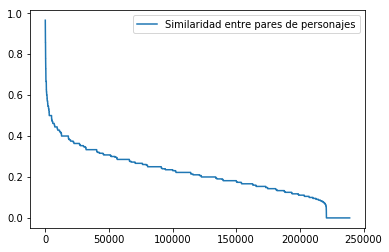

In [14]:
# Graficar similaridad
dictio = {i[0]+"/"+i[1]:i[2] for i in similarities}
plt.plot(range(0, len(dictio)), dictio.values(), label="Similaridad entre pares de personajes")
plt.legend()
plt.show()

Tenemos varios personajes que no son principales pero hay varios, por ejemplo: *Worker 1* y *Worker 2*. Comenzaremos quitándoles los números con Regex. Además, hay escenas donde se habla por teléfono y se agrega *\[on phone\]*, eliminaremos esto también.

In [15]:
# Regex para los números y teléfono
matching = "( \#[0-9])|( [0-9])|( \[on phone\])"
data['speaker'] = data['speaker'].str.replace(matching, '', regex=True)

len(data.speaker.unique())

648

Obtenemos una lista de los personajes significativos, utilizando como criterio aquellos que tengan más de 20 lineas.

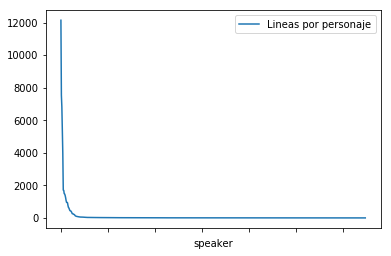

In [16]:
# Graficamos lineas por personajes
data.groupby(['speaker']).count().sort_values(by='line_text', ascending=False)['line_text'].plot(label="Lineas por personaje")
plt.legend()
plt.show()

In [17]:
# Obtenemos lista
main = list(
    data
    .groupby(['speaker'], as_index=False)
    .count()
    .query('line_text > 20')
    .sort_values(by='line_text', ascending=False)
    ['speaker']
)
print(main)

['michael', 'dwight', 'jim', 'pam', 'andy', 'kevin', 'angela', 'oscar', 'erin', 'ryan', 'darryl', 'phyllis', 'kelly', 'jan', 'toby', 'stanley', 'meredith', 'holly', 'nellie', 'creed', 'gabe', 'robert', 'david', 'karen', 'clark', 'roy', 'deangelo', 'charles', 'pete', 'jo', 'multiple', 'all', 'david wallace', 'katy', 'carol', 'donna', 'todd packer', 'val', 'danny', 'josh', 'jessica', 'packer', 'nate', 'man', 'brian', 'mr brown', 'cathy', 'helene', 'susan', 'hank', 'group', 'todd', 'daryl', 'eric', 'captain jack', 'mose', 'nick', 'trevor', 'aj', 'grotti', 'guy', 'isabel', 'tom', 'bob', "pam's mom", 'woman', 'host', 'senator lipton', 'jake', 'nurse', 'lester', 'improv teacher', 'harry', 'mark', 'ben franklin', 'tony', 'melissa', 'hannah', 'bert', 'bar manager', 'irene', 'casey', 'jada', 'pizza guy', 'vikram', 'walter', 'esther']


Para cada personaje principal, reemplazamos todos los "personajes" que sean al menos un 75% iguales.

In [18]:
speakers = list(data.speaker.unique())
for character in main:
    for speaker in speakers:
        if(difflib.SequenceMatcher(None, speaker, character).ratio() > .75):
            data['speaker'] = np.where(data['speaker'] == speaker, character, data['speaker'])      
len(data.speaker.unique())

591

Se logró reducir o eliminar más de 200 personajes que eran fruto de un error de los datos o redundancia. Cerca de **25.8% de los datos eran errores o redundancia**.

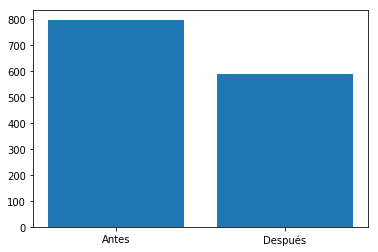

In [19]:
plt.bar(['Antes', 'Después'], [raw.speaker.unique().size, data.speaker.unique().size])
plt.show()

Todos los demás personajes, serán categorizados como extras.

In [20]:
speakers = list(data.speaker.unique())
for speaker in speakers:
    if(speaker not in main):
        data['speaker'] = np.where(data['speaker'] == speaker, 'extra', data['speaker'])      
len(data.speaker.unique())

85

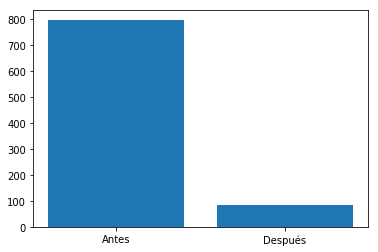

In [21]:
plt.bar(['Antes', 'Después'], [raw.speaker.unique().size, data.speaker.unique().size])
plt.show()

#### Limpieza de líneas
En los datos de líneas hay un error de encoding de caracteres especiales. Principalmente en la octava y novena temporada. Los limpiamos con replaces. Debido a que es inglés y hay un gran use de contracciones, la mayoría son comillas.

In [22]:
data.query('line_text.str.contains("���")', engine='python').line_text.count()

2559

In [23]:
data['line_text'] = data.line_text.str.replace("���s", "'s")
data['line_text'] = data.line_text.str.replace("���m", "'m")
data['line_text'] = data.line_text.str.replace("n���t", "n't")
data['line_text'] = data.line_text.str.replace("���ve", "'ve")
data['line_text'] = data.line_text.str.replace("���ll", "'ll")
data['line_text'] = data.line_text.str.replace("���re", "'re")
data['line_text'] = data.line_text.str.replace("���d", "'d")

# Lo que suponemos que no son comillas, simplemente son eliminados. Creemos que son -- o cosas por el estilo.
data['line_text'] = data.line_text.str.replace("���", "")

data.query('line_text.str.contains("���")', engine='python').line_text.count()

0

#### Unión con datos de calificación
Ahorita solo tenemos los datos de los scripts, es necesario unirlo con los datos de calificación de IMDB. Hacemos el join de los datos.

In [24]:
# Dataset que contiene información básica de series y películas
series = pd.read_csv('imdb-data/title.basics.tsv', sep='\t')

# Dataset que relaciona los capítulos con la serie a la que pertenecen
episodes = pd.read_csv('imdb-data/title.episode.tsv', sep='\t')

# Dataset de ratings por ID de IMDB
ratings = pd.read_csv('imdb-data/title.ratings.tsv', sep='\t')

/Users/jpnegrete/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
series.sample(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
2117107,tt2199755,tvEpisode,In Case of Complications,In Case of Complications,0,2012,\N,42,"Drama,Fantasy"
1299808,tt1345293,tvEpisode,L'ekrazatator,L'ekrazatator,0,\N,\N,\N,"Animation,Family"
3504017,tt5172022,tvEpisode,I Like Pointy Things,I Like Pointy Things,0,2013,\N,\N,Reality-TV


In [26]:
episodes.sample(3)

,tconst,parentTconst,seasonNumber,episodeNumber
2108764,tt4791732,tt3738648,1,20
791569,tt1506479,tt1483037,1,12
1296996,tt2263313,tt1260628,1,8


In [27]:
ratings.sample(3)

,tconst,averageRating,numVotes
39832,tt0063732,4.9,156
610906,tt2291941,9.0,6
10240,tt0027187,5.9,90


In [28]:
# Encontrar el identificador para "The Office"
q = '(originalTitle.str.contains("The Office")) and (titleType == "tvSeries") and (startYear == "2005") and (endYear == "2013")'
series.query(q, engine='python')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
371134,tt0386676,tvSeries,The Office,The Office,0,2005,2013,22,Comedy


Podemos notar que *tt0386676* es el identificador de la serie. Por lo que con esto podemos encontrar los capítulos en el segundo dataset.

In [29]:
# Buscamos los episodios pertenecientes a The Office únicamente
episodes = episodes.query('parentTconst == "tt0386676"', engine='python')
episodes.shape

(188, 4)

In [30]:
# Hacemos un left merge para asignar su calificación a cada capítulo y descartar las demás calificaciones
episodes = episodes.merge(ratings, left_on='tconst', right_on='tconst', how='left')
episodes.sample(5)

,tconst,parentTconst,seasonNumber,episodeNumber,averageRating,numVotes
132,tt1832204,tt0386676,7,17,7.5,1358
166,tt2366115,tt0386676,8,23,7.8,1192
50,tt1028389,tt0386676,3,22,9.1,2418
85,tt1248752,tt0386676,5,8,8.6,1790
4,tt0664514,tt0386676,1,2,8.3,3059


In [31]:
# Hacemos un mapping the str a int
episodes['episodeNumber'] = episodes['episodeNumber'].map(int)
episodes['seasonNumber'] = episodes['seasonNumber'].map(int)

In [32]:
# Realizamos el merge de los datos de script con las calificaciones
full = data.merge(episodes, left_on=['season', 'episode'] , right_on=['seasonNumber', 'episodeNumber'], how='outer')

In [33]:
# Vemos si hubo errores en merge
full.isna().sum()

season           2
episode          2
scene            2
line_text        2
speaker          2
deleted          2
tconst           0
parentTconst     0
seasonNumber     0
episodeNumber    0
averageRating    0
numVotes         0
dtype: int64

In [34]:
# Tenemos calificaciones para dos capítulos. Probablemente error de capítulos especiales (a veces contados como 2)
full = full.dropna()
full.sample(3)

,season,episode,scene,line_text,speaker,deleted,tconst,parentTconst,seasonNumber,episodeNumber,averageRating,numVotes
44167,7.0,20.0,10.0,"[smiling] Okay, well we'll work on it.",michael,False,tt1833196,tt0386676,7,20,8.9,1857
43776,7.0,18.0,26.0,Is he alright?,michael,False,tt1833194,tt0386676,7,18,9.2,2344
33960,6.0,10.0,28.0,Can you believe this? The money they spent on ...,oscar,False,tt1535367,tt0386676,6,10,8.6,1701


In [35]:
# Eliminamos toda la información (columnas) que no nos sirven
full = full.drop(['tconst', 'parentTconst', 'seasonNumber', 'episodeNumber'], axis=1)
full.sample(3)

,season,episode,scene,line_text,speaker,deleted,averageRating,numVotes
13889,3.0,15.0,23.0,I look,kelly,False,8.3,1964
51803,8.0,21.0,26.0,"Erin, I am so glad that you trusted me. You ca...",dwight,False,7.2,1362
48331,8.0,9.0,32.0,"This is my gym, my rules. You do exactly as I ...",dwight,False,7.8,1326


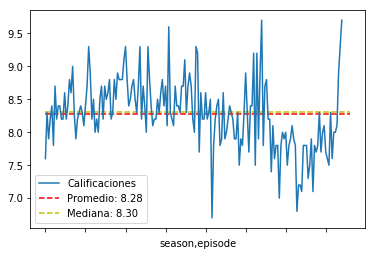

In [36]:
# Mostramos las calificaciones por capítulo
full.groupby(['season', 'episode'])['averageRating'].mean().plot(label='Calificaciones')
plt.hlines(
    y=full.groupby(['season', 'episode'])['averageRating'].mean().mean(),
    linestyles='--',
    color='r',
    xmin=0,
    xmax=190,
    label="Promedio: {:.2f}".format(full.groupby(['season', 'episode'])['averageRating'].mean().mean()))
plt.hlines(
    y=full.groupby(['season', 'episode'])['averageRating'].mean().median(),
    linestyles='--',
    color='y',
    xmin=0,
    xmax=190,
    label="Mediana: {:.2f}".format(full.groupby(['season', 'episode'])['averageRating'].mean().median()))
plt.legend()
plt.show()

In [37]:
print('Máxima:', full.numVotes.max(), '- Mínima:', full.numVotes.min())

Máxima: 6788 - Mínima: 1181


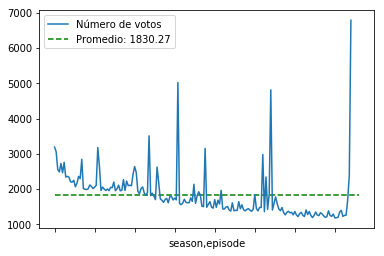

In [38]:
# Mostramos el número de votos de cada capítulo
full.groupby(['season', 'episode'])['numVotes'].mean().plot(label='Número de votos')
plt.hlines(
    y=full.groupby(['season', 'episode'])['numVotes'].mean().mean(),
    linestyles='--',
    color='g',
    xmin=0,
    xmax=190,
    label="Promedio: {:.2f}".format(full.groupby(['season', 'episode'])['numVotes'].mean().mean()))
plt.legend()
plt.show()

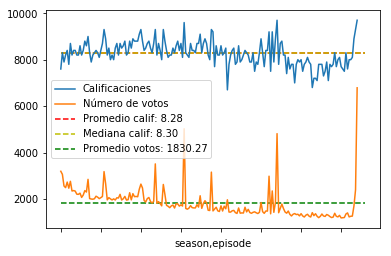

In [39]:
# Pequeña función para escalar y poder graficar en conjunto
def escala(x):
    return x*1000

# Graficamos ambas
full.groupby(['season', 'episode'])['averageRating'].mean().apply(escala).plot(label='Calificaciones')
plt.hlines(
    y=full.groupby(['season', 'episode'])['averageRating'].mean().apply(escala).mean(),
    linestyles='--',
    color='r',
    xmin=0,
    xmax=190,
    label="Promedio calif: {:.2f}".format(full.groupby(['season', 'episode'])['averageRating'].mean().mean()))
plt.hlines(
    y=full.groupby(['season', 'episode'])['averageRating'].mean().apply(escala).median(),
    linestyles='--',
    color='y',
    xmin=0,
    xmax=190,
    label="Mediana calif: {:.2f}".format(full.groupby(['season', 'episode'])['averageRating'].mean().median()))
full.groupby(['season', 'episode'])['numVotes'].mean().plot(label='Número de votos')
plt.hlines(
    y=full.groupby(['season', 'episode'])['numVotes'].mean().mean(),
    linestyles='--',
    color='g',
    xmin=0,
    xmax=190,
    label="Promedio votos: {:.2f}".format(full.groupby(['season', 'episode'])['numVotes'].mean().mean()))
plt.legend()
plt.show()

## Aprendizaje (primer acercamiento)

A partir de este momento comenzaremos a trabajar con clases de sklearn. Por esto, importaremos las clases generales.

In [40]:
# Importar clases de Cross Validation, partición del conjunto y métricas
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, f1_score

# Binarize multiclass
from sklearn.preprocessing import label_binarize

### Justificación
Intentaremos hacer aprendizaje supervisado con las calificaciones. Debido a que las calificaciones son un número real, las convertiremos en clases con base en el promedio y la mediana.

Definimos las clases de la siguiente manera:
 - Muy bueno: superior a 8.6
 - Bueno: inferior a 8.6 y superior a 8.3
 - Malo: inferior a 8.3 y superior a 8.0
 - Muy malo: inferior a 8.0

**Problema**: tenemos calificaciones por capítulo, no por escena. Por lo que realizaremos un acercamiento por capítulo.

En este acercamiento utilizaremos los siguientes datos para predecir:
 - Número de líneas de personajes principales en cada capítulo.
 - Agragado del sentimiento de todas las escenas del capítulo.

In [41]:
# Definimos nuestra función de clasificación
def classify(x):
    if(x < 8.0):
        return 'muy malo'
    elif(x < 8.3):
        return 'malo'
    elif(x < 8.6):
        return 'bueno'
    else:
        return 'muy bueno'

In [42]:
# Realizamos un pivot table para tener las líneas por personaje por escena
test = full.pivot_table(index = ['season', 'episode', 'scene'],
                        columns='speaker',
                        aggfunc=len,
                        fill_value=0,
                        values='line_text')

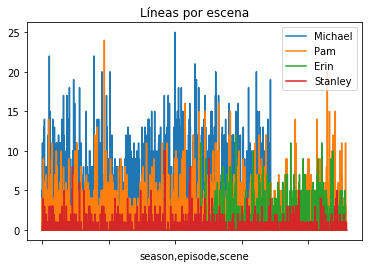

In [43]:
# Graficamos un preview de nuestros datos
test.michael.plot(label='Michael')
test.pam.plot(label='Pam')
test.erin.plot(label='Erin')
test.stanley.plot(label='Stanley')
plt.legend()
plt.title('Líneas por escena')
plt.show()

In [44]:
# Definimos una función para concatenar el texto por escena
def organiza(x):
    return pd.Series(dict(texto = ' '.join(x['line_text'])))

In [45]:
# Realizamos el merge con el texto
text = full.groupby(['season', 'episode', 'scene'], as_index=False).apply(organiza)
test = test.merge(text, left_on=['season', 'episode', 'scene'] , right_on=['season', 'episode', 'scene'], how='outer')
test.sample(3)

,,,aj,all,andy,angela,bar manager,ben franklin,bert,bob,brian,captain jack,...,todd,todd packer,tom,tony,trevor,val,vikram,walter,woman,texto
season,episode,scene,,,,,,,,,,,,,,,,,,,,,
2.0,6.0,25.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,You talkin' to me? You talkin' to me? 'Raging ...
5.0,21.0,40.0,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Literally every song is better a cappella. Nam...
7.0,24.0,47.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Um, how do I know that Robert is gay? He 'like..."


Para el análisis de sentimiento utilizaremos una herramienta de NLTK llamada VADER (Valence Aware Dictionary and sEntiment Reasoner). Este consiste en asignar una polaridad de sentimiento a cada palabra del texto a analizar con una base de datos que ya tiene (por lo que no requerimos entrenarlo). Utilizamos la librería por la facilidad.

In [46]:
# Importamos NLTK y descargamos Vader.
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jpnegrete/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [47]:
# Instaciamos
sid = SentimentIntensityAnalyzer()

In [48]:
# Definimos una función para polaridad, por cada palabra regresamos el compound (resultado final) de su polaridad
def sentiment(x):
    return sid.polarity_scores(x)['compound']

In [49]:
# Asignamos una columna para el sentimiento
test = test.assign(what = lambda x: x.texto.apply(sentiment))

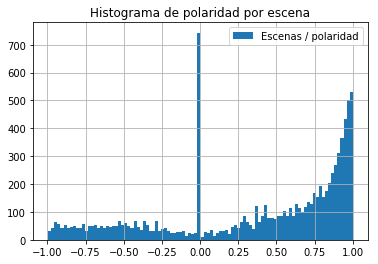

In [50]:
test.what.hist(bins=100, label='Escenas / polaridad')
plt.legend()
plt.title('Histograma de polaridad por escena')
plt.show()

Podemos notar que muchas escenas no tienen polaridad. Esto tiene sentido si consideramos que la serie graba conversaciones comunes y palabras como "Hola" no tienen ninguna connotación o positiva o negativa. También vemos que la densidad está cargada hacía el lado positivo, que tiene sentido ya que es una serie de comedia.

In [51]:
# Hacemos la agrupación por capítulo y episodio utilizando como función de agregación la suma
test = test.groupby(['season', 'episode']).sum()

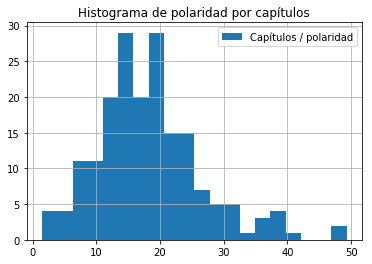

In [52]:
test.what.hist(bins=20, label='Capítulos / polaridad')
plt.legend()
plt.title('Histograma de polaridad por capítulos')
plt.show()

Podemos notar que la polaridad quedó positiva para todos los capítulos. Tiene sentido ya que esta en las escenas es desbalanceada y cargada a lo positivo.

In [53]:
# Realizamos una función para definir las calificaciones por capítulo en un DF
def frates(x):
    return pd.Series(dict(rate = x['averageRating'].mean()))

In [54]:
# Realizamos el merge con las calificaciones
rates = full.groupby(['season', 'episode'], as_index=False).apply(frates)
test = test.merge(rates, left_on=['season', 'episode'] , right_on=['season', 'episode'], how='outer')
test.sample(3)

,,aj,all,andy,angela,bar manager,ben franklin,bert,bob,brian,captain jack,...,todd packer,tom,tony,trevor,val,vikram,walter,woman,what,rate
season,episode,,,,,,,,,,,,,,,,,,,,,
5.0,7.0,0,0,69,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14.9504,8.3
3.0,4.0,0,0,4,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.3957,8.0
8.0,13.0,0,1,47,31,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,13.6920,7.5


Aplicaremos la función de clases para las calificaciones definida previamente.

In [55]:
# Aplicamos la función
test['rating'] = test.rate.apply(classify)

In [56]:
test.sample(5)

aj  all  andy  angela  bar manager  ben franklin  bert  bob  \
season episode                                                                
9.0    11.0      0    1     0      13            0             0     0    0   
8.0    16.0      0    2    20      11            0             0     0    0   
       20.0      0    3    48       8            0             0    19    0   
4.0    12.0      0    0    23       3            0             0     0    0   
8.0    18.0      0    1    20       3            0             0     0    0   

                brian  captain jack    ...     tom  tony  trevor  val  vikram  \
season episode                         ...                                      
9.0    11.0         0             0    ...       0     0       0    0       0   
8.0    16.0         0             0    ...       0     0       0    9       0   
       20.0         0             0    ...       0     0       0    0       0   
4.0    12.0         0             0    ...       0     0       0    0       0   
8.0    18.0         0             0    ...       0     0       0    0       0   

                walter  woman     what  rate    rating  
season episode                                          
9.0    11.0          0      0  14.9396   8.0      malo  
8.0    16.0          0      0  17.0198   8.1      malo  
       20.0          0      1  13.1059   7.2  muy malo  
4.0    12.0          0      0   9.8442   8.4     bueno  
8.0    18.0          0      0  15.5730   7.8  muy malo  

[5 rows x 88 columns]

### Modelado

Una vez que ya tenemos los datos listos para ser aplicados a este primer acercamiento comenzaremos con el modelado. Comenzamos importando e intentando con RandomForestClassifier.

In [57]:
from sklearn.ensemble import RandomForestClassifier

Debido a que GridSearchCV solo permite clasificaciones binarias, debemos convertir nuestro valor objetivo en One Hot.

In [58]:
y = label_binarize(test.rating, classes=['muy malo', 'malo', 'bueno', 'muy bueno'])

In [59]:
# Definimos un conjunto de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(
    test.drop(['rate', 'rating'], axis=1), # X
    y,  # y
    test_size=0.1)

In [60]:
# Definimos nuestro clasificador
rf = RandomForestClassifier(n_estimators=400, n_jobs=-1)

Definimos un grid de parámetros para realizar un Grid Search.

In [61]:
param = {
    'min_samples_split': [3, 5, 7],
    'class_weight': ['balanced', None]
}

In [62]:
# Creamos una clase GridSearchCV para encontrar los mejores hiperparámetros y realizar Cross-Validation
cross = GridSearchCV(rf, param, scoring='f1_micro', cv=5)

In [63]:
# Entrenamos el modelo con todos los datos y obtenemos los mejores parámetros
cross.fit(X_train, y_train)
cross.best_params_

/Users/jpnegrete/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'class_weight': None, 'min_samples_split': 3}

Iremos actualizando los hiperparámetros de acuerdo a los resultados de la iteración: 
 - Primera corrida: {'class_weight': 'balanced', 'min_samples_split': 15}
 - Segunda corrida: {'class_weight': 'balanced', 'min_samples_split': 5}

In [64]:
f1_score(y_test, cross.predict(X_test), average='micro')

0.23999999999999996

In [65]:
confusion_matrix(y_test.argmax(axis=1), cross.predict(X_test).argmax(axis=1))

array([[6, 0, 0, 0],
       [9, 0, 0, 0],
       [0, 0, 0, 1],
       [2, 1, 0, 0]])

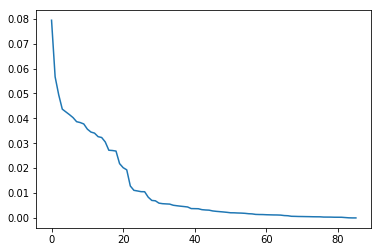

In [66]:
# Entrenamos un árbol particular para ver importancia de personajes
fi = RandomForestClassifier(n_estimators=400, n_jobs=-1, class_weight='balanced', min_samples_split=5)
fi.fit(X_train, y_train)

plt.plot(range(0, len(fi.feature_importances_)), sorted(list(fi.feature_importances_), reverse=True))
plt.show()

### Conclusiones primer intento

Pésima predicción. Lo que posiblemente afecto el score:
 - **Datos de predicción**
 - Conversión a One Hot pudo afectar.
 - Modelo (poco probable que salga algo mejor con otro).
 - Elección de número de clases.
 
Continuaremos en hacer cambios a los puntos dos a cuatro para ver si obtenemos mejores resultados.

#### Sin conversión a One Hot
No convertiremos a One Hot y utilizaremos los parámetros obtenidos en el GridSearch anterior.

In [67]:
# Definimos un conjunto de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(
    test.drop(['rate', 'rating'], axis=1), # X
    test.rating,  # y
    test_size=0.1)

In [68]:
# Entrenamos un árbol particular
fi = RandomForestClassifier(n_estimators=400, n_jobs=-1, class_weight='balanced', min_samples_split=5)
fi.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [69]:
f1_score(y_test, fi.predict(X_test), average='micro')

0.3684210526315789

In [70]:
confusion_matrix(y_test, fi.predict(X_test))

array([[0, 0, 3, 0],
       [1, 2, 4, 2],
       [0, 0, 2, 0],
       [0, 1, 1, 3]])

¡Mejoró!

#### Otros clasificadores
Ahora probaremos con otros modelos.

In [71]:
from sklearn.naive_bayes import BernoulliNB

In [72]:
nb = BernoulliNB(fit_prior=False)

In [73]:
nb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=False)

In [74]:
f1_score(y_test, nb.predict(X_test), average='micro')

0.3157894736842105

In [75]:
confusion_matrix(y_test, nb.predict(X_test))

array([[1, 1, 1, 0],
       [4, 0, 3, 2],
       [0, 0, 1, 1],
       [0, 0, 1, 4]])

Tuvimos resultados muy parecidos pero no mejores al RandomForest.

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
kn = KNeighborsClassifier(11)

In [78]:
kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [79]:
f1_score(y_test, kn.predict(X_test), average='micro')

0.3684210526315789

In [80]:
confusion_matrix(y_test, kn.predict(X_test))

array([[0, 2, 1, 0],
       [2, 3, 3, 1],
       [0, 1, 0, 1],
       [0, 1, 0, 4]])

Mejoró respecto al Random Forest. Vale la pena realizar un GridSearch.

In [81]:
y = label_binarize(test.rating, classes=['muy malo', 'malo', 'bueno', 'muy bueno'])

In [82]:
# Definimos un conjunto de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(
    test.drop(['rate', 'rating'], axis=1), # X
    y,  # y
    test_size=0.1)

In [83]:
kn = KNeighborsClassifier()

In [84]:
param = {
    'n_neighbors': range(1,30)
}

In [85]:
# Creamos una clase GridSearchCV para encontrar los mejores hiperparámetros y realizar Cross-Validation
cross = GridSearchCV(kn, param, scoring='f1_micro', cv=5)

In [86]:
# Entrenamos el modelo con todos los datos y obtenemos los mejores parámetros
cross.fit(X_train, y_train)
cross.best_params_

/Users/jpnegrete/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 1}

#### Número de clases
Ahora haremos un análisis cambiando el número de clase que estamos usando.

In [87]:
# Definimos nuestra función de clasificación con dos clases
def classify(x):
    if(x < 8.3):
        return 'malo'
    else:
        return 'bueno'

In [88]:
# Aplicamos la función
test['rating'] = test.rate.apply(classify)

In [89]:
# Definimos un conjunto de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(
    test.drop(['rate', 'rating'], axis=1), # X
    test.rating,  # y
    test_size=0.1)

Primero lo realizamos con RandomForestClassifier.

In [90]:
# Entrenamos un árbol particular
fi = RandomForestClassifier(n_estimators=400, n_jobs=-1, class_weight='balanced', min_samples_split=5)
fi.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [91]:
f1_score(y_test, fi.predict(X_test), average='micro')

0.6842105263157895

In [92]:
confusion_matrix(y_test, fi.predict(X_test))

array([[6, 3],
       [3, 7]])

Ahora con KNearestNeighbors.

In [93]:
# Entrenamos un modelo particular
kn = KNeighborsClassifier(11)
kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [94]:
f1_score(y_test, kn.predict(X_test), average='micro')

0.5263157894736842

In [95]:
confusion_matrix(y_test, kn.predict(X_test))

array([[4, 5],
       [4, 6]])

#### Mejora (¿o no?)

¡Mejoró! Sin embargo, es importante decir que la mejora se da a debido a una reducción de la complejidad del problema. Es más fácil predecir cuando se tiene un menor número de clases. Ahora solo nos queda cambiar una de las variables que consideramos que pueden ser los errores principales: los datos de entrada.

## Aprendizaje (segundo acercamiento)

### Justificación
Vemos que el acercamiento por personajes no funcionó tan bien. Por suerte (?) tenemos todas las líneas de cada personaje en la serie. Intentaremos hacer un acercamiento con minería de texto.

Utilizaremos únicamente las palabras en cada escena para tratar de predecir la calificación de esa escena.

Importamos las clases de texto que necesitaremos.

In [96]:
# Para realizar tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

In [97]:
# Para definir el comportamiento de cada variable en la agregación
def organiza(x):
    return pd.Series(dict(
        texto = ' '.join(x['line_text']), 
        pers = x['speaker'].value_counts().index[0],
        rate = x['averageRating'].mean(),
        votes = x['numVotes'].mean()))

In [98]:
# Creamos el dataset para el segundo acercamiento
test = full.groupby(['season', 'episode', 'scene'], as_index=False).apply(organiza)
test.sample(3)

,,,texto,pers,rate,votes
season,episode,scene,,,,
2.0,12.0,21.0,Did you see Born on the Fourth of July? I was...,michael,9.0,2843.0
3.0,12.0,50.0,Hey man. [Dwight hugs Jim and leaves] What hap...,karen,8.6,2006.0
9.0,1.0,8.0,Kelly Kapoor is gone. Her fianc�� Ravi was hir...,toby,7.8,1349.0


In [99]:
# Aplicamos función para crear las clases

# Definimos nuestra función de clasificación
def classify(x):
    if(x < 8.0):
        return 'muy malo'
    elif(x < 8.3):
        return 'malo'
    elif(x < 8.6):
        return 'bueno'
    else:
        return 'muy bueno'

def twoclasses(x):
    if(x < 8.3):
        return 'malo'
    else:
        return 'bueno'
    
# Aplicamos la función
test['rating'] = test.rate.apply(classify)
test['rating2'] = test.rate.apply(twoclasses)
test.sample(6)

texto  \
season episode scene                                                      
8.0    14.0    32.0   Yes, when he brushes your soft supple cheeks w...   
3.0    23.0    64.0   Hey you! Hey. How was your interview? Pretty g...   
8.0    20.0    17.0   [pops balloon] Suck it! [cheers, applause] And...   
6.0    10.0    38.0   Do you love her or do you love the idea of her...   
3.0    22.0    25.0   We will be team U.S.A. Very good. Pam, please ...   
       1.0     3.0    [sobbing] Jim is gone.  He's gone.  I miss him...   

                        pers  rate   votes     rating rating2  
season episode scene                                           
8.0    14.0    32.0   dwight   7.8  1220.0   muy malo    malo  
3.0    23.0    64.0      jan   9.3  2638.0  muy bueno   bueno  
8.0    20.0    17.0     andy   7.2  1278.0   muy malo    malo  
6.0    10.0    38.0     ryan   8.6  1701.0  muy bueno   bueno  
3.0    22.0    25.0     andy   9.1  2418.0  muy bueno   bueno  
       1.0     3.0    dwight   8.9  2651.0  muy bueno   bueno

### Modelado
Comenzamos con el modelado.

In [100]:
from sklearn.naive_bayes import MultinomialNB

In [122]:
# Instanciamos Tfidf
tf = TfidfVectorizer()

In [123]:
# Definimos un conjunto de entrenamiento y validación
indices_ent = np.random.rand(test.shape[0]) < 0.8
indices_pru = ~indices_ent

X_train = test.drop(['rate', 'rating', 'votes', 'rating2'], axis=1)[indices_ent]
X_test = test.drop(['rate', 'rating', 'votes', 'rating2'], axis=1)[indices_pru]
y_train = test.rating[indices_ent]
y_test = test.rating[indices_pru]

In [124]:
# Fit al tf-idf con el texto
tf.fit(test.texto)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [125]:
train_text = tf.transform(X_train.texto)
train_text

<7322x20977 sparse matrix of type '<class 'numpy.float64'>'
	with 356589 stored elements in Compressed Sparse Row format>

In [126]:
nb = MultinomialNB(fit_prior=False)
nb.fit(train_text, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

In [127]:
cross_validate(nb, train_text, y_train, cv=5, return_train_score=True, scoring='f1_micro')

{'fit_time': array([0.02218819, 0.0212791 , 0.02244687, 0.01906586, 0.01958489]),
 'score_time': array([0.00640583, 0.00376868, 0.00354028, 0.00351214, 0.00370812]),
 'test_score': array([0.3337884 , 0.3337884 , 0.34197952, 0.32991803, 0.32330827]),
 'train_score': array([0.53389107, 0.53508622, 0.54481817, 0.55633322, 0.55248336])}

In [128]:
f1_score(y_test, nb.predict(tf.transform(X_test.texto)), average='micro')

0.3404023926046765

#### Con dos clases

In [129]:
y_train = test.rating2[indices_ent]
y_test = test.rating2[indices_pru]

In [130]:
nb = MultinomialNB(fit_prior=False)
nb.fit(train_text, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

In [131]:
cross_validate(nb, train_text, y_train, cv=5, return_train_score=True, scoring='f1_micro')

{'fit_time': array([0.02073288, 0.01954985, 0.01829195, 0.01774693, 0.01799202]),
 'score_time': array([0.00490713, 0.00524521, 0.004637  , 0.00456405, 0.00459099]),
 'test_score': array([0.54061433, 0.51740614, 0.57172131, 0.57103825, 0.53756831]),
 'train_score': array([0.84616698, 0.84394741, 0.8552407 , 0.86377603, 0.87077501])}

In [132]:
f1_score(y_test, nb.predict(tf.transform(X_test.texto)), average='micro')

0.6340402392604676

Realmente tenemos un buen modelo, en comparación con los anteriores, basado en las palabras de las escenas. Pero tenemos una gran desventaja: no tenemos interpretabilidad alguna. No podemos estar escribiendo guiones como si nada para desecharlos si un modelo nos dice que no va a jalar. Entonces medimos la importancia de las palabras.

#### Medir importancia de las palabras
Medimos que tanto afecta una palabra a la clasificación.

In [133]:
y_train = test.rating[indices_ent]
wi = RandomForestClassifier(n_estimators=400, n_jobs=-1)
wi.fit(train_text, y_train)

y_train = test.rating2[indices_ent]
wi2 = RandomForestClassifier(n_estimators=400, n_jobs=-1)
wi2.fit(train_text, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

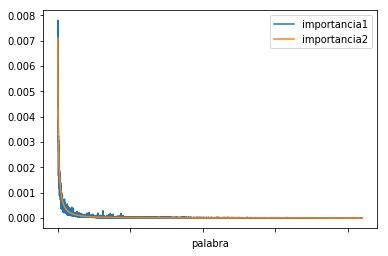

In [134]:
importancia = pd.DataFrame({
    'palabra': list(tf.vocabulary_.keys()),
    'importancia1': wi.feature_importances_,
    'importancia2': wi2.feature_importances_
}).sort_values(by='importancia2', ascending=False)
importancia.plot(x='palabra', y=['importancia1', 'importancia2'])
plt.show()

Tenemos la importancia de las palabras pero no sabemos para donde afectan. No sabemos si esa palabra que afecta con .008 nos lleva a un mal capítulo o a uno bueno. Podemos elegir perder certeza para tener mejor interpretabilidad.

In [135]:
indices = importancia.query('importancia2 > 0.0008').index
len(indices)

262

In [136]:
from sklearn.tree import DecisionTreeClassifier
y_train = test.rating2[indices_ent]

In [137]:
# Encontramos los mejors hiperparámetros
dt = DecisionTreeClassifier()
cross = GridSearchCV(dt, {'max_depth': range(20, 100)}, cv=5, n_jobs=-1, scoring='f1_micro')

Encontramos el mejor árbol con Cross Validation.

In [138]:
cross.fit(train_text[:, indices], y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(20, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1_micro',
       verbose=0)

In [139]:
print('El mejor estimador es:', cross.best_estimator_, 'con el score:', cross.best_score_)

El mejor estimador es: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') con el score: 0.539060366020213


In [140]:
cross_validate(
    cross.best_estimator_, 
    train_text[:, indices], 
    y_train, 
    cv=5, 
    return_train_score=True, 
    scoring='f1_micro')

{'fit_time': array([0.43568802, 0.46480989, 0.52837706, 0.44769001, 0.42190909]),
 'score_time': array([0.00578475, 0.00579786, 0.00593996, 0.00643706, 0.00661778]),
 'test_score': array([0.52969283, 0.54675768, 0.52527322, 0.55737705, 0.53346995]),
 'train_score': array([0.71350521, 0.7420181 , 0.76920451, 0.72226016, 0.71628542])}

Crearemos una foto del árbol de decision para tener interpretabilidad. ¿Qué combinaciones de palabras nos llevan a un promedio superior a 8.3?

In [143]:
from sklearn import tree
import graphviz

In [144]:
graf = tree.export_graphviz(
    cross.best_estimator_,
    out_file='arbol.dot', 
    feature_names=importancia.query('importancia2 > 0.0008').palabra.values,  
    class_names=['malo', 'bueno'],  
    filled=True, rounded=True,  
    special_characters=True)
graphviz.render('dot', 'png', 'arbol.dot')

'arbol.dot.png'

### Conclusiones segundo acercamiento
Una estimación del rating del capítulo con las palabras utilizadas por escena no mejora mucho a una estimación con personajes. Sin embargo, en este acercamiento tenemos interpretabilidad y entender qué palabras generan que resultados.

## Aprendizaje (tercer acercamiento)

### Justificación
Al tener un pivot de temporada-episodio-escena contra personajes, podemos verlo como un problema de asociación. Esto nos ayudará a ver las relaciones entre personajes que se crearon a lo largo de la serie.

Importamos las herramientas para realizar asociación apriori.

### Modelado

In [145]:
from apyori import apriori

In [149]:
# Realizamos un pivot table para tener las líneas por personaje por escena
test = full.pivot_table(index = ['season', 'episode', 'scene'],
                        columns='speaker',
                        aggfunc=len,
                        fill_value=0,
                        values='line_text')

In [151]:
# Obtenemos los personajes relevantes
personajes = list(test.columns)

In [153]:
# Realizamos un pivot table para tener las líneas por personaje por escena
apdf = full.pivot_table(index = ['season', 'episode', 'scene'],
                        columns='speaker',
                        aggfunc=len,
                        fill_value=0,
                        values='line_text')

In [154]:
# Lo convertimos a lista para convertir a algo procesable para apriori
aplist = apdf.values.tolist()
apdf.to_csv('apriori.csv')


In [155]:
# Procesamos las listas para apriori
for j in aplist:
    if(len(j) == 85):
        for index, item in enumerate(j):
            if(item != 0):
                j[index] = personajes[index]
                
for index, item in enumerate(aplist):
    aplist[index] = list(filter(lambda x: x != 0, item))

In [156]:
# Fijamos los criterios de reglas
reglas = list(
    apriori(
        aplist,
        min_support=0.01,
        min_confidence=0.1,
        min_lift=1))

In [157]:
# Imprimimos las reglas (gracias: https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/)
for item in reglas:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    print("Rule: " + str(pair))

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: frozenset({'andy'})
Support: 0.14649055779936687
Confidence: 0.14649055779936687
Lift: 1.0
Rule: frozenset({'dwight'})
Support: 0.2701670123348979
Confidence: 0.2701670123348979
Lift: 1.0
Rule: frozenset({'jim'})
Support: 0.2411308809081978
Confidence: 0.2411308809081978
Lift: 1.0
Rule: frozenset({'michael'})
Support: 0.34657788451042465
Confidence: 0.34657788451042465
Lift: 1.0
Rule: frozenset({'pam'})
Support: 0.21613360986791835
Confidence: 0.21613360986791835
Lift: 1.0
Rule: frozenset({'angela', 'andy'})
Support: 0.0155004912127497
Confidence: 0.10581222056631893
Lift: 1.2754549376421682
Rule: frozenset({'daryl', 'andy'})
Support: 0.0155004912127497
Confidence: 0.10581222056631893
Lift: 1.9782566379756077
Rule: frozenset({'erin', 'andy'})
Support: 0.025106429429101625
Confidence: 0.17138599105812222
Lift: 2.557112482220615
Rule: frozenset({'extra', 'andy'})
Support: 0.01560964960157188
Confidence: 0.10655737704918034
Lift: 1.0762647531946428
Rule: frozenset({'kevin', 'andy'})

Ya tenemos unas reglas de asociación, para poder verlas bien las graficamos con ayuda de la librería graphviz.

In [158]:
from graphviz import Graph, Digraph

In [162]:
grafo = Digraph()
grafo.attr(size='9,9')
grafo.node_attr.update(style='filled')
for rule in reglas:
    if(len(rule[0]) == 2):
        items = [x for x in rule[0]]
        if(rule[1] > 0.02):
            grafo.attr('node', shape='doublecircle')
            grafo.attr('node', color='mediumseagreen')
        else:
            grafo.attr('node', shape='circle')
            grafo.attr('node', color='lightblue2')
        for item in items:
            if(item == 'extra'):
                grafo.attr('node', color='violetred1')
            grafo.node(item)
        if(rule[2][0][2] < .15):
            grafo.attr('edge', style='dashed')
        else:
            grafo.attr('edge', style='filled')
        grafo.edge(items[0],
                   items[1],
                   #label=str(rule[2][0][2]),
                   weight='1',
                   penwidth=str(rule[2][0][3]))

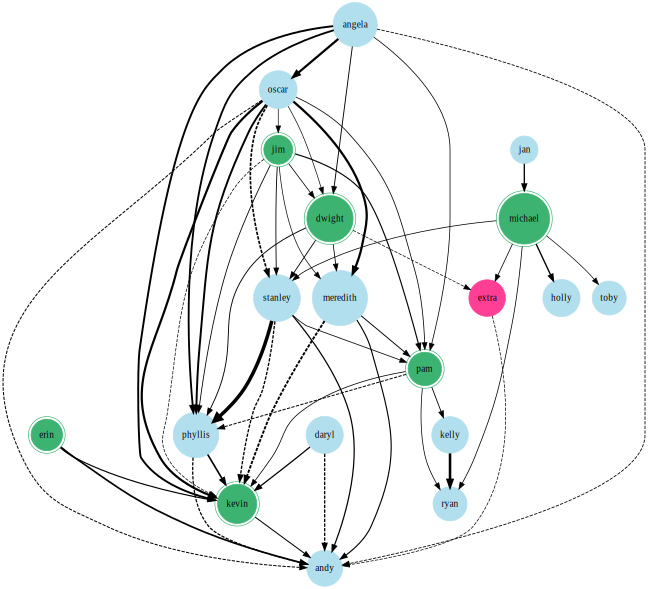

In [163]:
grafo

### Conclusiones tercer acercamiento
Con el acercamiento de asociación apriori podemos observar las relaciones de personajes. Si consideramos la asociación entre personajes A->B, la gráfica se puede interpretar de las siguiente manera:
 - Nodos verdes: personajes principales (aquellos que tienen un soporte mayor a 0.2).
 - Nodo rosa: personajes extras.
 - Grosor arista: entre más gruesa, más es el *lift* entre esos dos personajes. Es decir, es más probable que A y B salgan juntos que solo A.
 - Relleno arista: si es punteada, tiene una menor *confidence*. Es decir, que el personaje B sale en menor pocentaje de las escenas totales en las que sale A.

## Decisión
Con los tres acercamientos del documento podemos tomar decisiones como:
 - Qué personajes colocar juntos en escenas para obtener mejores resultados.
 - Qué palabras utilizar en los scripts para posiblemente obtener buenos resultados.
 - Cuando sale un personaje en escena, cual es la relación que se espera con otros personajes.